# House Prices Competition

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

## Import Data and Overview

In [215]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

SEED = 42

In [216]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [217]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [218]:
df_train.describe().round(1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1460.0,1201.0,1460.0,1460.0,1460.0,1460.0,1460.0,1452.0,1460.0,...,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,730.5,56.9,70.0,10516.8,6.1,5.6,1971.3,1984.9,103.7,443.6,...,94.2,46.7,22.0,3.4,15.1,2.8,43.5,6.3,2007.8,180921.2
std,421.6,42.3,24.3,9981.3,1.4,1.1,30.2,20.6,181.1,456.1,...,125.3,66.3,61.1,29.3,55.8,40.2,496.1,2.7,1.3,79442.5
min,1.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0
25%,365.8,20.0,59.0,7553.5,5.0,5.0,1954.0,1967.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0
50%,730.5,50.0,69.0,9478.5,6.0,5.0,1973.0,1994.0,0.0,383.5,...,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,163000.0
75%,1095.2,70.0,80.0,11601.5,7.0,6.0,2000.0,2004.0,166.0,712.2,...,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,214000.0
max,1460.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,...,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0,755000.0


In [219]:
df_train.drop(["Id"], axis=1, inplace=True)
id_test_list = df_test["Id"].tolist()
df_test.drop(["Id"], axis=1, inplace=True)

## Numerical and Categorical Data Separation

In [220]:
num_cols = []
cat_cols = []

for col in df_train.columns:
    if df_train[col].dtype in ('int64','float64'):
        num_cols.append(df_train[col].name)
    else:
        cat_cols.append(df_train[col].name)

numerical_df_train = df_train[num_cols]
categorical_df_train = df_train[cat_cols]

numerical_df_test = df_test[num_cols[0:-1]]
categorical_df_test = df_test[cat_cols]

## Missing Values

In [221]:
def drop_nan_num_cols(df):
    i = 0
    for col in df:
        if df[col].isnull().sum() / df_train.shape[0] > 0.3:
            df.drop(col, axis=1, inplace=True)
            print(f'column {col} is dropped')
            i += 1
    if i == 0:
        print('no column dropped')

def fill_nan_cat_cols(df):
    for col in df:
        if (col in num_cols) & (df[col].isnull().any()):
            df[col].fillna(df[col].mean(), inplace = True)
            print(f'fillna numerical column: {col}')
        if (col in cat_cols) & (df[col].isnull().any()):
            df[col].fillna(df[col].mode().iloc[0], inplace = True)
            print(f'fillna categorical column: {col}')

drop_nan_num_cols(df_train)
drop_nan_num_cols(df_test)
fill_nan_cat_cols(df_train)
fill_nan_cat_cols(df_test)

column Alley is dropped
column FireplaceQu is dropped
column PoolQC is dropped
column Fence is dropped
column MiscFeature is dropped
column Alley is dropped
column FireplaceQu is dropped
column PoolQC is dropped
column Fence is dropped
column MiscFeature is dropped
fillna numerical column: LotFrontage
fillna categorical column: MasVnrType
fillna numerical column: MasVnrArea
fillna categorical column: BsmtQual
fillna categorical column: BsmtCond
fillna categorical column: BsmtExposure
fillna categorical column: BsmtFinType1
fillna categorical column: BsmtFinType2
fillna categorical column: Electrical
fillna categorical column: GarageType
fillna numerical column: GarageYrBlt
fillna categorical column: GarageFinish
fillna categorical column: GarageQual
fillna categorical column: GarageCond
fillna categorical column: MSZoning
fillna numerical column: LotFrontage
fillna categorical column: Utilities
fillna categorical column: Exterior1st
fillna categorical column: Exterior2nd
fillna categor

## Converting Categorical Features to Numerical

In [222]:
numerical_cols_new = []
categorical_cols_new = []

for col in df_train.columns:
    if df_train[col].dtype in ('int64','float64'):
        numerical_cols_new.append(df_train[col].name)
    else:
        categorical_cols_new.append(df_train[col].name)

In [223]:
train_dummies = pd.get_dummies(df_train[categorical_cols_new], drop_first=True)
test_dummies = pd.get_dummies(df_test[categorical_cols_new], drop_first=True)

In [224]:
df_train.drop(categorical_cols_new, axis=1, inplace=True)
df_test.drop(categorical_cols_new, axis=1, inplace=True)

In [225]:
df_train = df_train.join(train_dummies)
df_test = df_test.join(test_dummies)

In [226]:
for col in df_train:
    if (col not in df_test.columns) & (col != 'SalePrice'):
        df_train.drop(col, axis=1, inplace=True)

for col in df_test:
    if col not in df_train.columns:
        df_test.drop(col, axis=1, inplace=True)

In [227]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 217 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(34), uint8(180)
memory usage: 678.8 KB


In [228]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 216 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(11), int64(25), uint8(180)
memory usage: 666.9 KB


## Train-Test Split

In [229]:
y = df_train['SalePrice']
X = df_train.drop('SalePrice', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

## Linear Regression Models

In [230]:
lr_model = ElasticNet()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
np.sqrt(mean_squared_log_error(y_test, y_pred))

d:\Projects\house-prices-competition\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.920e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


0.16674720950445246

In [231]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
np.sqrt(mean_squared_log_error(y_test, y_pred))

0.16169302546796235

In [232]:
lr_model = Ridge()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
np.sqrt(mean_squared_log_error(y_test, y_pred))

0.16144126253240007

In [233]:
lr_model = Lasso()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
np.sqrt(mean_squared_log_error(y_test, y_pred))

d:\Projects\house-prices-competition\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.095e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


0.1611862602312779

In [234]:
subm_preds = lr_model.predict(df_test)

submission = pd.DataFrame({
    "Id": id_test_list,
    "SalePrice": subm_preds})

submission.to_csv('data/lr_submission.csv', index=False)

## SVM

In [ ]:
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
np.sqrt(mean_squared_log_error(y_test, y_pred))

0.43219431808659065

In [ ]:
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
np.sqrt(mean_squared_log_error(y_test, y_pred))

0.18423168459291994

In [ ]:
subm_preds = svm_model.predict(df_test)

submission = pd.DataFrame({
    "Id": id_test_list,
    "SalePrice": subm_preds})

submission.to_csv('data/svm_submission.csv', index=False)

## Random Forest

In [235]:
rf_model = RandomForestRegressor(random_state=SEED)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_log_error(y_test, y_pred))

0.1542329018121354

In [236]:
subm_preds = rf_model.predict(df_test)

submission = pd.DataFrame({
    "Id": id_test_list,
    "SalePrice": subm_preds})

submission.to_csv('data/rf_submission.csv', index=False)

### Grid Search

In [237]:
rf_model = RandomForestRegressor()
rf_grid = {
    "n_estimators": np.arange(1, 201)
}

In [206]:
%%time

rf_grid_searcher = GridSearchCV(rf_model, rf_grid, cv=5, return_train_score=True)
rf_grid_searcher.fit(X_train, y_train)

CPU times: total: 30min 51s
Wall time: 31min 24s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,...
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199, 200])},
             return_train_score=True)

In [238]:
means = rf_grid_searcher.cv_results_['mean_test_score']
stds = rf_grid_searcher.cv_results_['std_test_score']

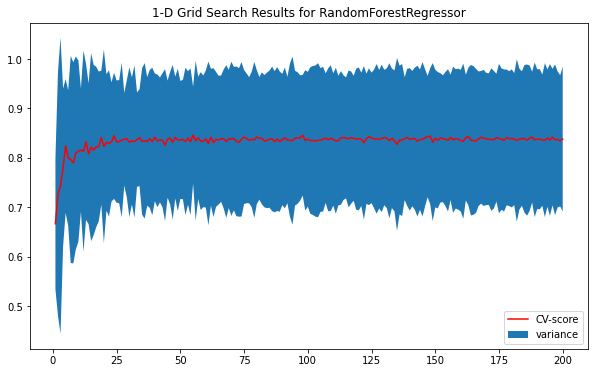

The best parameters: {'n_estimators': 55}, its score: 0.846


In [240]:
plt.figure(figsize=(10, 6))
xs = rf_grid_searcher.param_grid["n_estimators"]
plt.plot(xs, means, label="CV-score", color='red')
plt.fill_between(xs, means - 3 * stds, means + 3 * stds, label='variance')
plt.legend(loc='lower right')
plt.title('1-D Grid Search Results for RandomForestRegressor')
plt.show()

print('The best parameters: {}, its score: {:.3f}'.format(rf_grid_searcher.best_params_, rf_grid_searcher.best_score_))

In [241]:
rf_model = RandomForestRegressor(n_estimators=55, random_state=SEED)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_log_error(y_test, y_pred))

0.15377671869520476

In [242]:
subm_preds = rf_model.predict(df_test)

submission = pd.DataFrame({
    "Id": id_test_list,
    "SalePrice": subm_preds})

submission.to_csv('data/rf_best_submission.csv', index=False)

In [274]:
rf_model = RandomForestRegressor(n_estimators=2000, random_state=SEED)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_log_error(y_test, y_pred))

0.1514967726056607

In [273]:
subm_preds = rf_model.predict(df_test)

submission = pd.DataFrame({
    "Id": id_test_list,
    "SalePrice": subm_preds})

submission.to_csv('data/rf_best_submission.csv', index=False)